In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [63]:
import numpy as np

import torch
import random
import math
import json

from tqdm import tqdm_notebook
from boltons.iterutils import pairwise
from scipy.stats import kendalltau
from itertools import permutations

from sent_order.models.kt_regression import SentenceEncoder, Regressor, Corpus
from sent_order.perms import sample_uniform_perms

In [4]:
sent_encoder = torch.load(
    '../../data/models/new/kt-reg/sent_encoder.366.bin',
    map_location={'cuda:0': 'cpu'},
)

In [5]:
regressor = torch.load(
    '../../data/models/new/kt-reg/regressor.366.bin',
    map_location={'cuda:0': 'cpu'},
)

/Users/dclure/Projects/plot-ordering/env/lib/python3.6/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'sent_order.models.kt_regression.Regressor' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [6]:
train = Corpus('../../data/dev.json/', 10000)

100%|██████████| 10000/10000 [00:01<00:00, 6913.28it/s]


In [268]:
grafs = [g for g in train.grafs if len(g.sentences) == 7]

In [269]:
len(grafs)

948

In [270]:
graf = random.choice(grafs)

In [271]:
[' '.join(s.tokens) for s in graf.sentences]

['Quantum canonical transformations have attracted interest since the beginning of quantum theory .',
 'Based on their classical analogues , one would expect them to provide a powerful quantum tool .',
 'However , the difficulty of solving a nonlinear operator partial differential equation such as the quantum Hamilton - Jacobi equation ( QHJE ) has hindered progress along this otherwise promising avenue .',
 'We overcome this difficulty .',
 'We show that solutions to the QHJE can be constructed by a simple prescription starting from the propagator of the associated Schroedinger equation .',
 'Our result opens the possibility of practical use of quantum Hamilton - Jacobi theory .',
 'As an application we develop a surprising relation between operator ordering and the density of paths around a semiclassical trajectory .']

In [272]:
sents = sent_encoder(graf.sentence_variables())

In [273]:
sents

Variable containing:
-6.8243e-04  3.5591e-02 -3.6487e-04  ...  -7.3289e-04 -6.8066e-05 -2.4075e-07
-3.0519e-01 -1.1575e-01  4.7751e-03  ...  -6.1099e-02  1.4382e-06 -1.2031e-02
 1.8642e-02  3.2341e-04 -2.5376e-05  ...  -1.4952e-03  3.7989e-04 -2.7757e-04
                ...                   ⋱                   ...                
-4.4565e-03 -4.8992e-04 -6.5411e-04  ...   3.5327e-06  1.8784e-03 -2.3240e-02
-2.5119e-02 -5.2569e-02 -2.5094e-03  ...  -1.2397e-03 -3.6775e-04  5.7452e-02
 1.0561e-03 -2.9633e-04 -1.2499e-02  ...   3.7022e-06  1.2958e-07  2.3497e-02
[torch.FloatTensor of size 7x1000]

In [276]:
perms = list(permutations(range(7)))

In [277]:
x = []
kts = []
for perm in tqdm_notebook(perms):
    
    sort = torch.LongTensor(perm)
    x.append(sents[sort])
    
    kt = kendalltau(perm, range(7)).correlation
    kts.append(kt)

HBox(children=(IntProgress(value=0, max=5040), HTML(value='')))

In [278]:
x = torch.stack(x)
y = regressor(x)

In [279]:
y = (1-y)*2-1

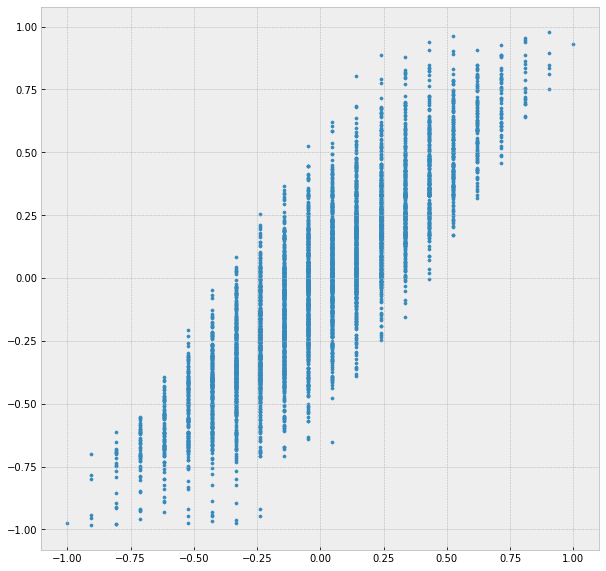

In [282]:
plt.figure(figsize=(10,10))
plt.scatter(kts, y.data.tolist(), s=10)